In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing


from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
%matplotlib inline

In [2]:
from pathlib import Path
from zipfile import ZipFile
from io import BytesIO  
import requests  
import json  
#import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

In [3]:
def upload_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.upload_file(Filename=local_file_name, Bucket=credentials['BUCKET'],Key=key)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Uploaded')

In [4]:
def download_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.download_file(Bucket=credentials['BUCKET'],Key=key,Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')

In [5]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_3 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-e5e81556-000f-4d93-86d4-b60748f7fe20',
    'IBM_API_KEY_ID': 'aNSEN31wTP6yZ20pw5EHvlrvMRBa1wK97un-2eiazXn5',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'courseracapstone-donotdelete-pr-5lsxokvrardkjz',
    'FILE': 'Neighborhoods.csv'
}

Load arcgis

In [6]:
!conda install -c esri arcgis  --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - arcgis


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-0.23.4              |   py35h04863e7_0        10.0 MB
    jeepney-0.3.1              |           py35_0          36 KB
    pyshp-1.2.12               |           py35_0          35 KB
    arcgis-1.6.1               |   py35h39e3cac_3         2.1 MB  esri
    jupyterlab_launcher-0.13.1 |           py35_0          36 KB
    keyring-13.2.1             |           py35_0          46 KB
    ca-certificates-2019.5.15  |                0         133 KB
    secretstorage-3.1.0        |           py35_0          23 KB
    jupyterlab-0.34.9          |           py35_0        10.0 MB
    ------------------------------------------------------------
                                           Total:        2

In [7]:
!jupyter nbextension enable arcgis --py --sys-prefix

Exception while loading config file /var/pod/.runtime/config/jupyter_notebook_config.py
    Traceback (most recent call last):
      File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/traitlets/config/application.py", line 562, in _load_config_files
        config = loader.load_config()
      File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/traitlets/config/loader.py", line 457, in load_config
        self._read_file_as_dict()
      File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/traitlets/config/loader.py", line 489, in _read_file_as_dict
        py3compat.execfile(conf_filename, namespace)
      File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipython_genutils/py3compat.py", line 198, in execfile
        exec(compiler(f.read(), fname, 'exec'), glob, loc)
      File "/var/pod/.runtime/config/jupyter_notebook_config.py", line 15, in <module>
        from cdsax_jupyter_extensions.ax_log import ax_log_request
    ImportError: No modu

In [9]:
from arcgis.gis import GIS
from arcgis.geocoding import get_geocoders, batch_geocode, geocode, reverse_geocode
from arcgis.geometry import Point

In [10]:
!conda install conda-build fiona shapely pyproj rtree --force --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - conda-build
    - fiona
    - pyproj
    - rtree
    - shapely


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    munch-2.3.2                |           py35_0          13 KB
    gdal-2.2.2                 |   py35h40af447_1         774 KB
    libboost-1.67.0            |       h46d08c1_4        20.9 MB
    libgdal-2.2.2              |       h804cdde_1        16.1 MB
    libdap4-3.19.0             |       h8c95237_1         1.6 MB
    proj4-4.9.3                |       hc8507d1_7         3.2 MB
    hdf4-4.2.13                |       h3ca952b_2         916 KB
    kealib-1.4.7               |       h79811e5_5         170 KB
    libkml-1.3.0               |       h590aaf7_4         633 KB
    libspatialite-4.3.0a       |      h72746d6_18         3.1 MB
    fion

In [11]:
!conda install geopandas  --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    descartes-1.1.0            |   py35h2f9c1c0_0           9 KB
    mapclassify-2.0.1          |             py_0          26 KB
    geopandas-0.4.1            |             py_0         891 KB
    ------------------------------------------------------------
                                           Total:         926 KB

The following NEW packages will be INSTALLED:

    descartes:   1.1.0-py35h2f9c1c0_0
    geopandas:   0.4.1-py_0          
    mapclassify: 2.0.1-py_0          


descartes-1.1.0      | 9 KB      | ####

In [11]:
!conda list

# packages in environment at /opt/conda/envs/DSX-Python35:
#
# Name                    Version                   Build  Channel
alabaster                 0.7.10           py35h6fb19ab_0  
anaconda-client           1.6.5            py35hd900ed1_0  
anaconda-project          0.8.0            py35hb597f32_0  
arcgis                    1.6.1            py35h39e3cac_3    esri
asn1crypto                0.22.0           py35h0d675fe_1  
astroid                   1.5.3            py35h1d0c565_0  
astropy                   2.0.2            py35h2d2a8a6_4  
astunparse                1.5.0                     <pip>
babel                     2.5.0            py35ha5fc564_0  
backports                 1.0              py35hd471ac7_1  
backports.shutil_get_terminal_size 1.0.0            py35h40844db_2  
backports.weakref         1.0rc1                   py35_0  
beautifulsoup4            4.6.0            py35h442a8c9_1  
biopython                 1.69                np113py35_0  
bitarray           

In [12]:
#import requests # library to handle requests
import geopandas
import shapely
import pyproj
import rtree
import fiona
from geopandas import GeoDataFrame
from shapely.geometry import Point
shapely.speedups.enable()

In [13]:
!conda install -c conda-forge geoplot geopy ipywidgets nodejs pillow sdl2_ttf pyshp --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geoplot
    - geopy
    - ipywidgets
    - nodejs
    - pillow
    - pyshp
    - sdl2_ttf


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xorg-libxext-1.3.4         |       h516909a_0          51 KB  conda-forge
    kiwisolver-1.0.1           |   py35h2d50403_2         924 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    libxcb-1.13                |    h14c3975_1002         396 KB  conda-forge
    dbus-1.13.2                |       h714fa37_1         554 KB
    harfbuzz-1.9.0             |    he243708_1001         957 KB  conda

xorg-libxext-1.3.4   | 51 KB     | ##################################### | 100% 
kiwisolver-1.0.1     | 924 KB    | ##################################### | 100% 
geographiclib-1.49   | 32 KB     | ##################################### | 100% 
libxcb-1.13          | 396 KB    | ##################################### | 100% 
dbus-1.13.2          | 554 KB    | ##################################### | 100% 
harfbuzz-1.9.0       | 957 KB    | ##################################### | 100% 
pango-1.40.14        | 532 KB    | ##################################### | 100% 
xorg-libxpm-3.5.12   | 64 KB     | ##################################### | 100% 
poppler-0.65.0       | 1.6 MB    | ##################################### | 100% 
qt-5.9.6             | 87.1 MB   | ##################################### | 100% 
matplotlib-3.0.0     | 6.9 MB    | ##################################### | 100% 
pillow-5.3.0         | 1014 KB   | ##################################### | 100% 
conda-4.5.11         | 636 K

In [14]:
import geoplot
import geopy
import ipywidgets

In [15]:
!jupyter lab clean

In [16]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

> /opt/conda/envs/DSX-Python35/bin/npm pack @jupyter-widgets/jupyterlab-manager
npm notice 
npm notice 📦  @jupyter-widgets/jupyterlab-manager@0.41.0
npm notice === Tarball Contents === 
npm notice 2.3kB  package.json        
npm notice 1.5kB  LICENSE             
npm notice 2.0kB  README.md           
npm notice 277B   lib/index.d.ts      
npm notice 1.0kB  lib/index.js        
npm notice 5.3kB  lib/manager.d.ts    
npm notice 14.1kB lib/manager.js      
npm notice 1.9kB  lib/output.d.ts     
npm notice 5.9kB  lib/output.js       
npm notice 830B   lib/plugin.d.ts     
npm notice 7.3kB  lib/plugin.js       
npm notice 956B   lib/renderer.d.ts   
npm notice 4.3kB  lib/renderer.js     
npm notice 216B   lib/semvercache.d.ts
npm notice 972B   lib/semvercache.js  
npm notice 375B   schema/plugin.json  
npm notice === Tarball Details === 
npm notice name:          @jupyter-widgets/jupyterlab-manager          
npm notice version:       0.41.0                                       
npm notice

⠁ entities@^1.1.1⠂ safer-buffer@>= 2.1.2 < 3⠄ safer-buffer@>= 2.1.2 < 3⡀ safer-buffer@>= 2.1.2 < 3⢀ @jupyterlab/inspector@^0.18.4⠠ @jupyterlab/inspector@^0.18.4⠐ @jupyterlab/inspector@^0.18.4⠈ @jupyterlab/inspector@^0.18.4⠁ @jupyterlab/launcher@^0.18.4⠂ @jupyterlab/launcher@^0.18.4⠄ @jupyterlab/launcher@^0.18.4⡀ @jupyterlab/console@^0.18.4⢀ @jupyterlab/console@^0.18.4⠠ @jupyterlab/console@^0.18.4⠐ @jupyterlab/help-extension@^0.18.4⠈ @jupyterlab/help-extension@^0.18.4⠁ @jupyterlab/help-extension@^0.18.4⠂ @jupyterlab/help-extension@^0.18.4⠄ react@~16.4.0⡀ react@~16.4.0⢀ react@~16.4.0⠠ react@~16.4.0⠐ xterm@~3.3.0⠈ @jupyterlab/notebook-extension@^0.18.4⠁ @jupyterlab/notebook-extension@^0.18.4⠂ @jupyterlab/notebook-extension@^0.18.4⠄ @phosphor/widgets@^1.6.0⡀ @phosphor/widgets@^1.6.0⢀ @phosphor/widgets@^1.6.0⠠ @phosphor/widgets@^1.6.0⠐ @phosphor/widgets@^1.6.0⠈ @phosphor/widgets@^1.6.0⠁ @phosphor/widgets@^1.6.0⠂ @jupyterlab/json-extension@^0.17.4⠄ @jupyterlab/json-extension@^0.17.4⡀ @jupyte

⠄ font-awesome@~4.7.0⡀ @jupyterlab/theme-dark-extension@^0.18.4⢀ @jupyterlab/theme-dark-extension@^0.18.4⠠ @jupyterlab/theme-dark-extension@^0.18.4⠐ @jupyterlab/extensionmanager-extension@^0.18.4⠈ @jupyterlab/extensionmanager-extension@^0.18.4⠁ @jupyterlab/extensionmanager-extension@^0.18.4⠂ @jupyterlab/extensionmanager-extension@^0.18.4⠄ @jupyterlab/apputils-extension@^0.18.4⡀ @jupyterlab/apputils-extension@^0.18.4⢀ @jupyterlab/apputils-extension@^0.18.4⠠ @jupyterlab/settingeditor-extension@^0.13.4⠐ @jupyterlab/settingeditor-extension@^0.13.4⠈ @jupyterlab/settingeditor-extension@^0.13.4⠁ html-loader@^0.5.1⠂ uglify-js@3.4.x⠄ source-map@~0.5.0⡀ webpack@~4.12.0⢀ debug@^3.1.0⠠ vm-browserify@^1.0.1⠐ leb@^0.3.0⠈ to-regex@^3.0.1⠁ isarray@^1.0.0⠂ y18n@^4.0.0⠄ inherits@2.0.1⡀ evp_bytestokey@^1.0.0⢀ p-try@^1.0.0⠠ readable-stream@^2.0.2⠐ safe-buffer@^5.0.1⠈ readable-stream@^2.0.0⠁ brorand@^1.0.1⠂ minimalistic-assert@^1.0.0⠄ is-buffer@^1.1.5⡀ readable-stream@^2.0.6⢀ sax@^1.2.4⠠ sax@^1.2.4⠐ sax@^1

[-----------------------------------------------------------------------] 0/828[-----------------------------------------------------------------------] 3/828[-----------------------------------------------------------------------] 4/828[#----------------------------------------------------------------------] 8/828[#---------------------------------------------------------------------] 11/828[#---------------------------------------------------------------------] 14/828[##--------------------------------------------------------------------] 19/828[##--------------------------------------------------------------------] 21/828[##--------------------------------------------------------------------] 24/828[##--------------------------------------------------------------------] 28/828[###-------------------------------------------------------------------] 31/828[###-------------------------------------------------------------------] 33/828[###------------------------------------------------

[#######################################------------------------------] 469/828[########################################-----------------------------] 481/828[#########################################----------------------------] 488/828[##########################################---------------------------] 500/828[##########################################---------------------------] 508/828[###########################################--------------------------] 518/828[############################################-------------------------] 529/828[#############################################------------------------] 539/828[##############################################-----------------------] 549/828[###############################################----------------------] 562/828[################################################---------------------] 571/828[#################################################--------------------] 583/828[##################################################-

⠁ ⠁ [2/2] ⠂ webpack-cli[1/2] ⠂ core-js[2/2] ⠄ webpack-cli[1/2] ⠄ core-js[2/2] ⡀ webpack-cli[1/2] ⡀ core-js[2/2] ⢀ webpack-cli[1/2] ⢀ core-js[2/2] ⠠ webpack-cli[1/2] ⠠ core-js[2/2] ⠐ webpack-cli[1/2] ⠐ core-js[2/2] ⠈ webpack-cli[1/2] ⠈ core-js[2/2] ⠁ webpack-cli[1/2] ⠁ core-js[-/2] ⠂ waiting...[1/2] ⠂ core-js[-/2] ⠄ waiting...[1/2] ⠄ core-js[-/2] ⡀ waiting...[1/2] ⡀ core-js[-/2] ⢀ waiting...[1/2] ⢀ core-js[-/2] ⠠ waiting...[1/2] ⠠ core-jssuccess Saved lockfile.
warning Your current version of Yarn is out of date. The latest version is "1.16.0", while you're on "1.9.4".
Done in 34.87s.
> node /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/jupyterlab/staging/yarn.js run build
yarn run v1.9.4
$ webpack
Hash: 1f2a20543723978d3e58
Version: webpack 4.12.2
Time: 9581ms
Built at: 06/13/2019 6:20:57 PM
                                                             Asset       Size                                  Chunks             Chunk Names
                              674f50d287a8c4

Done in 11.46s.


In [17]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Exception while loading config file /var/pod/.runtime/config/jupyter_notebook_config.py
    Traceback (most recent call last):
      File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/traitlets/config/application.py", line 562, in _load_config_files
        config = loader.load_config()
      File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/traitlets/config/loader.py", line 457, in load_config
        self._read_file_as_dict()
      File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/traitlets/config/loader.py", line 489, in _read_file_as_dict
        py3compat.execfile(conf_filename, namespace)
      File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipython_genutils/py3compat.py", line 198, in execfile
        exec(compiler(f.read(), fname, 'exec'), glob, loc)
      File "/var/pod/.runtime/config/jupyter_notebook_config.py", line 15, in <module>
        from cdsax_jupyter_extensions.ax_log import ax_log_request
    ImportError: No modu

In [18]:
!pip install kivy-garden 

  Running setup.py bdist_wheel for kivy-garden ... done
  Stored in directory: /home/dsxuser/.cache/pip/wheels/e5/09/36/4bec048252175b6aa7ba75441cbeed8f31a0bea37abedcfed0
Successfully built kivy-garden
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [19]:
!garden install mapview

Progression 1024 | 
Progression 2048 / 
Progression 3072 - 
Progression 4096 \ 
Progression 5120 | 
Progression 6144 / 
Progression 7168 - 
Progression 8192 \ 
Progression 9216 | 
Progression 10240 / 
Progression 11264 - 
Progression 12288 \ 
Progression 13312 | 
Progression 14336 / 
Progression 15360 - 
Progression 16384 \ 
Progression 17408 | 
Progression 18432 / 
Progression 19456 - 
Progression 20480 \ 
Progression 21504 | 
Progression 22528 / 
Progression 23552 - 
Progression 24576 \ 
Progression 25600 | 
Progression 26624 / 
Progression 27648 - 
Progression 28672 \ 
Progression 29696 | 
Progression 30720 / 
Progression 31744 - 
Progression 32768 \ 
Progression 33792 | 
Progression 34816 / 
Progression 35840 - 
Progression 36864 \ 
Progression 37888 | 
Progression 38912 / 
Progression 39936 - 
Progression 40960 \ 
Progression 41984 | 
Progression 43008 / 
Progression 44032 - 
Progression 45056 \ 
Progression 46080 | 
Progression 47104 / 
Progression 48128 - 
Progression 49152 \ 
P

In [11]:
# Create a map widget
#gis = GIS()
#public_data_item_id = 'a04933c045714492bda6886f355416f2'
#data_item = gis.content.get(public_data_item_id)

# `ContentManager.get` will return `None` if there is no Item with ID `a04933c045714492bda6886f355416f2`
#data_item

In [13]:
# configure where we should save our data, and where the ZIP file is located

#data_path = Path('./data')

#if not data_path.exists():
#   data_path.mkdir()

#zip_path = data_path.joinpath('LA_Hub_Datasets.zip')
#extract_path = data_path.joinpath('LA_Hub_datasets')
#arg_path = str(data_path)
#data_item.download(save_path=arg_path)

In [14]:
#zip_file = ZipFile('data/LAHubDatasets.zip')
#zip_file.extractall('data/LAHubDatasets')

In [6]:
!ls ./

In [16]:
#p = Path('data/LAHubDatasets/LA_Hub_Datasets')
#list(file.name for file in p.glob('*'))

In [17]:
#gis = GIS("https://www.arcgis.com", username="fleason", password="nUF5bA0@U&k1X")

In [18]:
#type(gis.content)

In [19]:
#parks_properties = {
#    'title': 'Parks and Open Space',
#    'tags': 'parks, open data, tutorials',
#    'type': 'Shapefile'
#}

In [20]:
# data_file_location = 'Parks_and_Open_Space1.zip'
# parks_shp = gis.content.add(parks_properties, data=data_file_location)

# You can now visualize the Item object `parks_shp` in rich HTML notation in your notebook.
# parks_shp

In [21]:
#parks_feature_layer_item = parks_shp.publish()

# Then visualize the new feature layer
#parks_feature_layer_item

In [22]:
#parks_feature_layer_item.url

In [23]:
#gis_geocode = GIS("https://www.arcgis.com", username="fleason", password="nUF5bA0@U&k1X")

In [24]:
#geocode_result = geocode(address="Space Needle", as_featureset=True)

# A list of features
#geocode_result.features

In [25]:
#m = gis_geocode.map("Seattle, WA", zoomlevel=11)
#m

In [26]:
#m.draw(geocode_result)

In [20]:
#gis_lat_long = GIS("http://www.arcgis.com", "fleason", "nUF5bA0@U&k1X")

# use the first of GIS's configured geocoders
#geocoder = get_geocoders(gis_lat_long)[0]

In [20]:
#print("MaxBatchSize : " + str(geocoder.properties.locatorProperties.MaxBatchSize))
#print("SuggestedBatchSize : " + str(geocoder.properties.locatorProperties.SuggestedBatchSize))

!wget -O OLCC_Licenses.xls http://www.olcc.state.or.us/pdfs/licenses_by_type_excel.xls
ORLicenses = pd.read_excel("OLCC_Licenses.xls", skiprows=8)
ORLicenses.head()

ORLicenses.drop(['License No.', 'Premises No.', 'Effective Date', 'Expiration',
        'Licensee Name',  'License Action',
        'Prem Phone', 'Mailing Address', 'Mailing City',
       'Mail State', 'Mail Zip', 'Second Location to License No.'], axis=1, inplace=True)

OR_MULTNOMAH = ORLicenses.loc[ORLicenses['Prem County'] == "MULTNOMAH"]
OR_MULTNOMAH.head()

# intialise data of lists. 
data = {'LicenseCode':["BRW", "BRWNC", "BP", "DIST","DISTT","F-COM","F_FPC", "F_CLU", "F_PL","F-PC", "GSP","GSPNC","L", "WY","WYNC"],
        'LicenseType':["Brewery", "Brewery", "Brewery-Public House", "Distillery","Distillery Tasting","Full On-Premises Sales, Commercial",
                       "Full On-Premises Sales, For-Profit Private Club", "Full On-Premises Sales, Nonprofit Private Club", 
                       "Full On-Premises Sales, Other Public Location","Full On-Premises Sales, Public Passenger Carrier", 
                       "Grower Sales Privilege","Grower Sales Privilege","Limited On-Premises Sales","Winery","Winery"]} 
  
# Create DataFrame 
OR_Type = pd.DataFrame(data) 
  
# Print the output. 
OR_Type

dfToList = OR_Type['LicenseCode'].tolist()
dfToList

# df['countries'].isin(c1)
OR_MULTNOMAH_Type = OR_MULTNOMAH.loc[OR_MULTNOMAH['Type'].isin (dfToList)]
OR_MULTNOMAH_Type.head()

OR_MULTNOMAH_Type['Premises'] = OR_MULTNOMAH_Type['Premises Street Address'].astype(str) + ' , ' +  OR_MULTNOMAH_Type['Premises City'] + ' , ' + OR_MULTNOMAH_Type['Prem State']
OR_MULTNOMAH_Type.head()

OR_MULTNOMAH_Type.shape

2493 / 150

OR_MULTNOMAH_Type.to_csv(path_or_buf= 'OR_MULTNOMAH_Type.csv' )

In [21]:
download_file_cos (credentials_3,'WA_KING.csv','WA_KING.csv')

File Downloaded


In [23]:
p = Path('./')
list(file.name for file in p.glob('*'))

['WA_KING.csv']

In [22]:
WA_KING = pd.read_csv("WA_KING.csv")
WA_KING.head()

,Unnamed: 0,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status,Premises
0,0,'AMONOS! MEXICAN KITCHEN,15321 MAIN ST NE STE 201,DUVALL,WA,980198574,20180327,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"15321 MAIN ST NE STE 201 , DUVALL ..."
1,1,/NA:M/ THAI CUISINE,1404 34TH AVE,SEATTLE,WA,981223334,20090608,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"1404 34TH AVE , SEATTLE ..."
2,2,00 PIZZA,31217 124TH AVE SE STE 6,AUBURN,WA,980923618,20121015,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"31217 124TH AVE SE STE 6 , AUBURN ..."
3,3,028 BARBER SHOP,14031 NE WOODINVILLE DUVALL RD,WOODINVILLE,WA,980728504,20181115,SNACK BAR,KING,ACTIVE (ISSUED),"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ..."
4,4,108 VIETNAMESE CAJUN CRAWFISH BROILER,18114 E VALLEY HWY,KENT,WA,980321001,20141105,BEER/WINE REST - BEER,KING,ACTIVE (ISSUED),"18114 E VALLEY HWY , KENT ..."


In [23]:
WA_KING.rename(index=str, columns={"Unnamed: 0": "Sequence"})

,Sequence,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status,Premises
0,0,'AMONOS! MEXICAN KITCHEN,15321 MAIN ST NE STE 201,DUVALL,WA,980198574,20180327,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"15321 MAIN ST NE STE 201 , DUVALL ..."
1,1,/NA:M/ THAI CUISINE,1404 34TH AVE,SEATTLE,WA,981223334,20090608,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"1404 34TH AVE , SEATTLE ..."
2,2,00 PIZZA,31217 124TH AVE SE STE 6,AUBURN,WA,980923618,20121015,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"31217 124TH AVE SE STE 6 , AUBURN ..."
3,3,028 BARBER SHOP,14031 NE WOODINVILLE DUVALL RD,WOODINVILLE,WA,980728504,20181115,SNACK BAR,KING,ACTIVE (ISSUED),"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ..."
4,4,108 VIETNAMESE CAJUN CRAWFISH BROILER,18114 E VALLEY HWY,KENT,WA,980321001,20141105,BEER/WINE REST - BEER,KING,ACTIVE (ISSUED),"18114 E VALLEY HWY , KENT ..."
5,5,11TH FRAME RESTAURANT & LOUNGE,7638 NE BOTHELL WAY,KENMORE,WA,980280000,19971009,SPIRITS/BR/WN REST LOUNGE -,KING,ACTIVE (ISSUED),"7638 NE BOTHELL WAY , KENMORE ..."
6,6,125TH ST GRILL,12255 AURORA AVE N,SEATTLE,WA,981338032,20190523,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"12255 AURORA AVE N , SEATTLE ..."
7,7,13 COINS BELLEVUE,900 BELLEVUE WAY NE STE 100,BELLEVUE,WA,980044219,20150323,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"900 BELLEVUE WAY NE STE 100 , BELLEVUE ..."
8,8,13 COINS RESTAURANTS,125 BOREN AVE N,SEATTLE,WA,981095301,20060622,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"125 BOREN AVE N , SEATTLE ..."
9,9,13 COINS RESTAURANTS,125 BOREN AVE N,SEATTLE,WA,981095301,20060622,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"125 BOREN AVE N , SEATTLE ..."


In [26]:
PremisesList = WA_KING['Premises'].tolist()
#PremisesList

In [27]:
PremisesList = list(set(PremisesList))

In [28]:
# How many elements each 
# list should have 
n = 150
  
# using list comprehension 
PremisesListChunk = [PremisesList[i * n:(i + 1) * n] for i in range((len(PremisesList) + n - 1) // n )]  


In [29]:
PremisesListChunk[24]

['305 HARRISON ST # 206          , SEATTLE                  , WA',
 '5813-A AIRPORT WAY S           , SEATTLE                  , WA',
 '8230 35TH AVE NE               , SEATTLE                  , WA',
 '4552 KLAHANIE DR SE            , SAMMAMISH                , WA',
 '213 BROADWAY E                 , SEATTLE                  , WA',
 '206 MAIN ST                    , KIRKLAND                 , WA',
 '35109 FISH HATCHERY RD SE      , FALL CITY                , WA',
 '912 12TH AVE                   , SEATTLE                  , WA',
 '606 5TH AVE S # 2              , SEATTLE                  , WA',
 '17623 100TH AVE SW             , VASHON                   , WA',
 '120 NW GILMAN BLVD             , ISSAQUAH                 , WA',
 '1525 A STREET STE 110          , AUBURN                   , WA',
 '428 15TH AVE E                 , SEATTLE                  , WA',
 '600 E PINE ST                  , SEATTLE                  , WA',
 '8900 161ST AVE NE STE 165      , REDMOND                  , 

# input - df: a Dataframe, chunkSize: the chunk size
# output - a list of DataFrame
# purpose - splits the DataFrame into smaller of max size chunkSize (last is smaller)
def splitDataFrameIntoSmaller(df, chunkSize = 10000): 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
    return listOfDf

df_split = splitDataFrameIntoSmaller(OR_MULTNOMAH_Type, chunkSize = 150)

df_split[16].head()

PremisesList = df_split[16]['Premises'].tolist()
PremisesList

In [30]:
results = GIS("https://www.arcgis.com", username="fleason", password="nUF5bA0@U&k1X")

In [173]:
results = batch_geocode(PremisesListChunk[24])

jresult = json_normalize(results)
jresult.head()

,address,attributes.AddBldg,attributes.AddNum,attributes.AddNumFrom,attributes.AddNumTo,attributes.AddRange,attributes.Addr_type,attributes.BldgName,attributes.BldgType,attributes.Block,...,attributes.X,attributes.Xmax,attributes.Xmin,attributes.Y,attributes.Ymax,attributes.Ymin,attributes.Zone,location.x,location.y,score
0,"305 Harrison St, Seattle, Washington, 98109",,305,,,,PointAddress,,,,...,-122.351281,-122.350661,-122.352661,47.622121,47.622979,47.620979,,-122.351281,47.622121,100.00
1,"5813 Airport Way S, Seattle, Washington, 98108",,5813,,,,PointAddress,,,,...,-122.318166,-122.317343,-122.319343,47.550460,47.551393,47.549393,,-122.318166,47.550460,99.99
2,"8230 35th Ave NE, Seattle, Washington, 98115",,8230,,,,PointAddress,,,,...,-122.290662,-122.288133,-122.292132,47.689208,47.691227,47.687227,,-122.290662,47.689208,100.00
3,"4552 Klahanie Dr SE, Issaquah, Washington, 98029",,4552,,,,PointAddress,,,,...,-122.005688,-122.002414,-122.006414,47.565199,47.568134,47.564134,,-122.005688,47.565199,100.00
4,"213 Broadway E, Seattle, Washington, 98102",,213,,,,PointAddress,,,,...,-122.320953,-122.320272,-122.322272,47.620431,47.621422,47.619422,,-122.320953,47.620431,100.00


In [177]:
jresult.shape

(84, 62)

In [64]:
#jresult.drop(['attributes.AddBldg', 'attributes.AddNum',
#       'attributes.AddNumFrom', 'attributes.AddNumTo', 'attributes.AddRange',
#       'attributes.Addr_type', 'attributes.BldgName', 'attributes.BldgType',
#       'attributes.Block', 'attributes.City', 'attributes.Country',
#       'attributes.DisplayX', 'attributes.DisplayY', 'attributes.Distance',
#       'attributes.District', 'attributes.ExInfo', 'attributes.LangCode',
#       'attributes.LevelName', 'attributes.LevelType', 'attributes.Loc_name',
#       'attributes.LongLabel', 'attributes.Match_addr', 'attributes.MetroArea',
#       'attributes.Phone', 'attributes.PlaceName',
#       'attributes.Place_addr', 'attributes.Postal', 'attributes.PostalExt',
#       'attributes.Rank', 'attributes.Region', 'attributes.RegionAbbr',
#       'attributes.ResultID', 'attributes.Score', 'attributes.Sector',
#       'attributes.ShortLabel', 'attributes.Side', 'attributes.StAddr',
#       'attributes.StDir', 'attributes.StName', 'attributes.StPreDir',
#       'attributes.StPreType', 'attributes.StType', 'attributes.Status',
#       'attributes.SubAddr', 'attributes.Subregion', 'attributes.Territory',
#       'attributes.Type', 'attributes.URL', 'attributes.UnitName',
#       'attributes.UnitType', 'attributes.Xmax',
#       'attributes.Xmin','attributes.Ymax', 'attributes.Ymin',
#       'attributes.Zone', 'location.x', 'location.y', 'score'], axis=1, inplace=True)

In [174]:
PremisesDFChunk = pd.DataFrame(PremisesListChunk[24])
PremisesDFChunk.head()

,0
0,"305 HARRISON ST # 206 , SEATTLE ..."
1,"5813-A AIRPORT WAY S , SEATTLE ..."
2,"8230 35TH AVE NE , SEATTLE ..."
3,"4552 KLAHANIE DR SE , SAMMAMISH ..."
4,"213 BROADWAY E , SEATTLE ..."


In [175]:
#df_split[16].reset_index(drop=True, inplace=True)
#jresult.reset_index(drop=True, inplace=True)
frames = [PremisesDFChunk, jresult]
dfsplitconcat = pd.concat(frames, axis=1)
dfsplitconcat.head()

,0,address,attributes.AddBldg,attributes.AddNum,attributes.AddNumFrom,attributes.AddNumTo,attributes.AddRange,attributes.Addr_type,attributes.BldgName,attributes.BldgType,...,attributes.X,attributes.Xmax,attributes.Xmin,attributes.Y,attributes.Ymax,attributes.Ymin,attributes.Zone,location.x,location.y,score
0,"305 HARRISON ST # 206 , SEATTLE ...","305 Harrison St, Seattle, Washington, 98109",,305,,,,PointAddress,,,...,-122.351281,-122.350661,-122.352661,47.622121,47.622979,47.620979,,-122.351281,47.622121,100.00
1,"5813-A AIRPORT WAY S , SEATTLE ...","5813 Airport Way S, Seattle, Washington, 98108",,5813,,,,PointAddress,,,...,-122.318166,-122.317343,-122.319343,47.550460,47.551393,47.549393,,-122.318166,47.550460,99.99
2,"8230 35TH AVE NE , SEATTLE ...","8230 35th Ave NE, Seattle, Washington, 98115",,8230,,,,PointAddress,,,...,-122.290662,-122.288133,-122.292132,47.689208,47.691227,47.687227,,-122.290662,47.689208,100.00
3,"4552 KLAHANIE DR SE , SAMMAMISH ...","4552 Klahanie Dr SE, Issaquah, Washington, 98029",,4552,,,,PointAddress,,,...,-122.005688,-122.002414,-122.006414,47.565199,47.568134,47.564134,,-122.005688,47.565199,100.00
4,"213 BROADWAY E , SEATTLE ...","213 Broadway E, Seattle, Washington, 98102",,213,,,,PointAddress,,,...,-122.320953,-122.320272,-122.322272,47.620431,47.621422,47.619422,,-122.320953,47.620431,100.00


In [176]:
Outfile = 'WA_24.csv'

dfsplitconcat.to_csv(path_or_buf= Outfile )
#p = Path('./')
#list(file.name for file in p.glob('*'))

upload_file_cos (credentials_3,Outfile,Outfile)

File Uploaded


In [35]:
p = Path('./')
list(file.name for file in p.glob('*'))

['WA_KING.csv', 'WA_Locations.csv']

In [37]:
download_file_cos (credentials_3,"WA_0.csv","WA_0.csv")
download_file_cos (credentials_3,"WA_1.csv","WA_1.csv")
download_file_cos (credentials_3,"WA_2.csv","WA_2.csv")
download_file_cos (credentials_3,"WA_3.csv","WA_3.csv")
download_file_cos (credentials_3,"WA_4.csv","WA_4.csv")
download_file_cos (credentials_3,"WA_5.csv","WA_5.csv")
download_file_cos (credentials_3,"WA_6.csv","WA_6.csv")
download_file_cos (credentials_3,"WA_7.csv","WA_7.csv")
download_file_cos (credentials_3,"WA_8.csv","WA_8.csv")
download_file_cos (credentials_3,"WA_9.csv","WA_9.csv")
download_file_cos (credentials_3,"WA_10.csv","WA_10.csv")
download_file_cos (credentials_3,"WA_11.csv","WA_11.csv")
download_file_cos (credentials_3,"WA_12.csv","WA_12.csv")
download_file_cos (credentials_3,"WA_13.csv","WA_13.csv")
download_file_cos (credentials_3,"WA_14.csv","WA_14.csv")
download_file_cos (credentials_3,"WA_15.csv","WA_15.csv")
download_file_cos (credentials_3,"WA_16.csv","WA_16.csv")
download_file_cos (credentials_3,"WA_17.csv","WA_17.csv")
download_file_cos (credentials_3,"WA_18.csv","WA_18.csv")
download_file_cos (credentials_3,"WA_19.csv","WA_19.csv")
download_file_cos (credentials_3,"WA_20.csv","WA_20.csv")
download_file_cos (credentials_3,"WA_21.csv","WA_21.csv")
download_file_cos (credentials_3,"WA_22.csv","WA_22.csv")
download_file_cos (credentials_3,"WA_23.csv","WA_23.csv")
download_file_cos (credentials_3,"WA_24.csv","WA_24.csv")



File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded


In [38]:
WA_0= pd.read_csv ('WA_0.csv')
WA_1= pd.read_csv ('WA_1.csv')
WA_2= pd.read_csv ('WA_2.csv')
WA_3= pd.read_csv ('WA_3.csv')
WA_4= pd.read_csv ('WA_4.csv')
WA_5= pd.read_csv ('WA_5.csv')
WA_6= pd.read_csv ('WA_6.csv')
WA_7= pd.read_csv ('WA_7.csv')
WA_8= pd.read_csv ('WA_8.csv')
WA_9= pd.read_csv ('WA_9.csv')
WA_10= pd.read_csv ('WA_10.csv')
WA_11= pd.read_csv ('WA_11.csv')
WA_12= pd.read_csv ('WA_12.csv')
WA_13= pd.read_csv ('WA_13.csv')
WA_14= pd.read_csv ('WA_14.csv')
WA_15= pd.read_csv ('WA_15.csv')
WA_16= pd.read_csv ('WA_16.csv')
WA_17= pd.read_csv ('WA_17.csv')
WA_18= pd.read_csv ('WA_18.csv')
WA_19= pd.read_csv ('WA_19.csv')
WA_20= pd.read_csv ('WA_20.csv')
WA_21= pd.read_csv ('WA_21.csv')
WA_22= pd.read_csv ('WA_22.csv')
WA_23= pd.read_csv ('WA_23.csv')
WA_24= pd.read_csv ('WA_24.csv')




In [40]:
WA_23.shape

(150, 64)

In [41]:
WA_Locations = pd.concat([WA_0,WA_1,WA_1,WA_2,WA_3,WA_4,WA_5,WA_6,WA_7,WA_8,WA_9,WA_10,WA_11,WA_12,WA_13,WA_14,WA_15,WA_16,WA_17,WA_18,WA_19,WA_20,WA_21,WA_22,WA_23,WA_24])

In [42]:
WA_Locations.head()

,Unnamed: 0,0,address,attributes.AddBldg,attributes.AddNum,attributes.AddNumFrom,attributes.AddNumTo,attributes.AddRange,attributes.Addr_type,attributes.BldgName,attributes.BldgType,attributes.Block,attributes.City,attributes.Country,attributes.DisplayX,attributes.DisplayY,attributes.Distance,attributes.District,attributes.ExInfo,attributes.LangCode,attributes.LevelName,attributes.LevelType,attributes.Loc_name,attributes.LongLabel,attributes.Match_addr,attributes.MetroArea,attributes.Nbrhd,attributes.Phone,attributes.PlaceName,attributes.Place_addr,attributes.Postal,attributes.PostalExt,attributes.Rank,attributes.Region,attributes.RegionAbbr,attributes.ResultID,attributes.Score,attributes.Sector,attributes.ShortLabel,attributes.Side,attributes.StAddr,attributes.StDir,attributes.StName,attributes.StPreDir,attributes.StPreType,attributes.StType,attributes.Status,attributes.SubAddr,attributes.Subregion,attributes.Territory,attributes.Type,attributes.URL,attributes.UnitName,attributes.UnitType,attributes.X,attributes.Xmax,attributes.Xmin,attributes.Y,attributes.Ymax,attributes.Ymin,attributes.Zone,location.x,location.y,score
0,0,"161 SOUTHCENTER MALL , TUKWILA ...","161 Southcenter Mall, Seattle, Washington, 98188",NaN,161,299.0,133.0,133-299,StreetAddress,NaN,NaN,NaN,Seattle,USA,-122.261224,47.458819,0,NaN,NaN,ENG,NaN,NaN,World,"161 Southcenter Mall, Seattle, WA, 98188, USA","161 Southcenter Mall, Seattle, Washington, 98188",Seattle Metro Area,NaN,NaN,NaN,"161 Southcenter Mall, Seattle, Washington, 98188",98188,2835.0,20.0,Washington,WA,0,100.0,NaN,161 Southcenter Mall,R,161 Southcenter Mall,NaN,Southcenter,NaN,NaN,Mall,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.261224,-122.260224,-122.262224,47.458819,47.459819,47.457819,NaN,-122.261224,47.458819,100.0
1,1,"1501 PIKE PL STE 200 , SEATTLE ...","1501 Pike Pl, #200, Seattle, Washington, 98101",NaN,1501,NaN,NaN,NaN,Subaddress,NaN,NaN,NaN,Seattle,USA,-122.341180,47.608803,0,NaN,NaN,ENG,NaN,NaN,World,"1501 Pike Pl, #200, Seattle, WA, 98101, USA","1501 Pike Pl, #200, Seattle, Washington, 98101",Seattle Metro Area,Pike Market,NaN,NaN,"1501 Pike Pl, #200, Seattle, Washington, 98101",98101,1501.0,20.0,Washington,WA,1,100.0,NaN,"1501 Pike Pl, #200",L,1501 Pike Pl,NaN,Pike,NaN,NaN,Pl,M,#200,King County,NaN,NaN,NaN,200,Ste,-122.341005,-122.340180,-122.342180,47.608927,47.609803,47.607803,NaN,-122.341005,47.608927,100.0
2,2,"1016 MADISON ST , SEATTLE ...","1016 Madison St, Seattle, Washington, 98104",NaN,1016,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Seattle,USA,-122.325633,47.609334,0,NaN,NaN,ENG,NaN,NaN,World,"1016 Madison St, Seattle, WA, 98104, USA","1016 Madison St, Seattle, Washington, 98104",Seattle Metro Area,First Hill,NaN,NaN,"1016 Madison St, Seattle, Washington, 98104",98104,1243.0,20.0,Washington,WA,2,100.0,NaN,1016 Madison St,L,1016 Madison St,NaN,Madison,NaN,NaN,St,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.325504,-122.324633,-122.326633,47.609200,47.610334,47.608334,NaN,-122.325504,47.609200,100.0
3,3,"811 3RD ST , RENTON ...","811 S 3rd St, Renton, Washington, 98057",NaN,811,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Renton,USA,-122.205911,47.479518,0,NaN,NaN,ENG,NaN,NaN,World,"811 S 3rd St, Renton, WA, 98057, USA","811 S 3rd St, Renton, Washington, 98057",Seattle Metro Area,NaN,NaN,NaN,"811 S 3rd St, Renton, Washington, 98057",98057,2737.0,20.0,Washington,WA,3,99.5,NaN,811 S 3rd St,R,811 S 3rd St,NaN,3rd,S,NaN,St,T,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.205911,-122.204910,-122.206910,47.479651,47.480518,47.478518,NaN,-122.205910,47.479651,99.5
4,4,"1406 LAKE TAPPS PKWY E STE 100 , AUBURN ...","1406 Lake Tapps Pkwy E, Auburn, Washington, 98092",NaN,1406,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Auburn,USA,-122.210451,47.244393,0,NaN,NaN,ENG,NaN,NaN,World,"1406 Lake Tapps Pkwy E, Auburn, WA, 98092, USA","1406 Lake Tapps Pkwy E, Auburn, Washington, 98092",Seattle Metro Area,NaN,NaN,NaN,"1406 Lake Tapps Pkwy E, Auburn, Washington, 98092",98092,8154.0,20.0,Washington,WA,4,100.0,NaN,1406 Lake T

In [43]:
WA_Locations.shape

(3834, 64)

In [45]:
Outfile = 'WA_Locations.csv'

WA_Locations.to_csv(path_or_buf= Outfile )
#p = Path('./')
#list(file.name for file in p.glob('*'))

upload_file_cos (credentials_3,Outfile,Outfile)

File Uploaded


In [24]:
pd.set_option('display.max_columns', 999)

In [190]:
WA_Locations.head()

,Unnamed: 0,0,address,attributes.AddBldg,attributes.AddNum,attributes.AddNumFrom,attributes.AddNumTo,attributes.AddRange,attributes.Addr_type,attributes.BldgName,attributes.BldgType,attributes.Block,attributes.City,attributes.Country,attributes.DisplayX,attributes.DisplayY,attributes.Distance,attributes.District,attributes.ExInfo,attributes.LangCode,attributes.LevelName,attributes.LevelType,attributes.Loc_name,attributes.LongLabel,attributes.Match_addr,attributes.MetroArea,attributes.Nbrhd,attributes.Phone,attributes.PlaceName,attributes.Place_addr,attributes.Postal,attributes.PostalExt,attributes.Rank,attributes.Region,attributes.RegionAbbr,attributes.ResultID,attributes.Score,attributes.Sector,attributes.ShortLabel,attributes.Side,attributes.StAddr,attributes.StDir,attributes.StName,attributes.StPreDir,attributes.StPreType,attributes.StType,attributes.Status,attributes.SubAddr,attributes.Subregion,attributes.Territory,attributes.Type,attributes.URL,attributes.UnitName,attributes.UnitType,attributes.X,attributes.Xmax,attributes.Xmin,attributes.Y,attributes.Ymax,attributes.Ymin,attributes.Zone,location.x,location.y,score
0,0,"161 SOUTHCENTER MALL , TUKWILA ...","161 Southcenter Mall, Seattle, Washington, 98188",NaN,161,299.0,133.0,133-299,StreetAddress,NaN,NaN,NaN,Seattle,USA,-122.261224,47.458819,0,NaN,NaN,ENG,NaN,NaN,World,"161 Southcenter Mall, Seattle, WA, 98188, USA","161 Southcenter Mall, Seattle, Washington, 98188",Seattle Metro Area,NaN,NaN,NaN,"161 Southcenter Mall, Seattle, Washington, 98188",98188,2835.0,20.0,Washington,WA,0,100.0,NaN,161 Southcenter Mall,R,161 Southcenter Mall,NaN,Southcenter,NaN,NaN,Mall,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.261224,-122.260224,-122.262224,47.458819,47.459819,47.457819,NaN,-122.261224,47.458819,100.0
1,1,"1501 PIKE PL STE 200 , SEATTLE ...","1501 Pike Pl, #200, Seattle, Washington, 98101",NaN,1501,NaN,NaN,NaN,Subaddress,NaN,NaN,NaN,Seattle,USA,-122.341180,47.608803,0,NaN,NaN,ENG,NaN,NaN,World,"1501 Pike Pl, #200, Seattle, WA, 98101, USA","1501 Pike Pl, #200, Seattle, Washington, 98101",Seattle Metro Area,Pike Market,NaN,NaN,"1501 Pike Pl, #200, Seattle, Washington, 98101",98101,1501.0,20.0,Washington,WA,1,100.0,NaN,"1501 Pike Pl, #200",L,1501 Pike Pl,NaN,Pike,NaN,NaN,Pl,M,#200,King County,NaN,NaN,NaN,200,Ste,-122.341005,-122.340180,-122.342180,47.608927,47.609803,47.607803,NaN,-122.341005,47.608927,100.0
2,2,"1016 MADISON ST , SEATTLE ...","1016 Madison St, Seattle, Washington, 98104",NaN,1016,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Seattle,USA,-122.325633,47.609334,0,NaN,NaN,ENG,NaN,NaN,World,"1016 Madison St, Seattle, WA, 98104, USA","1016 Madison St, Seattle, Washington, 98104",Seattle Metro Area,First Hill,NaN,NaN,"1016 Madison St, Seattle, Washington, 98104",98104,1243.0,20.0,Washington,WA,2,100.0,NaN,1016 Madison St,L,1016 Madison St,NaN,Madison,NaN,NaN,St,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.325504,-122.324633,-122.326633,47.609200,47.610334,47.608334,NaN,-122.325504,47.609200,100.0
3,3,"811 3RD ST , RENTON ...","811 S 3rd St, Renton, Washington, 98057",NaN,811,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Renton,USA,-122.205911,47.479518,0,NaN,NaN,ENG,NaN,NaN,World,"811 S 3rd St, Renton, WA, 98057, USA","811 S 3rd St, Renton, Washington, 98057",Seattle Metro Area,NaN,NaN,NaN,"811 S 3rd St, Renton, Washington, 98057",98057,2737.0,20.0,Washington,WA,3,99.5,NaN,811 S 3rd St,R,811 S 3rd St,NaN,3rd,S,NaN,St,T,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.205911,-122.204910,-122.206910,47.479651,47.480518,47.478518,NaN,-122.205910,47.479651,99.5
4,4,"1406 LAKE TAPPS PKWY E STE 100 , AUBURN ...","1406 Lake Tapps Pkwy E, Auburn, Washington, 98092",NaN,1406,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Auburn,USA,-122.210451,47.244393,0,NaN,NaN,ENG,NaN,NaN,World,"1406 Lake Tapps Pkwy E, Auburn, WA, 98092, USA","1406 Lake Tapps Pkwy E, Auburn, Washington, 98092",Seattle Metro Area,NaN,NaN,NaN,"1406 Lake Tapps Pkwy E, Auburn, Washington, 98092",98092,8154.0,20.0,Washington,WA,4,100.0,NaN,1406 Lake T

In [25]:
download_file_cos(credentials_3,"WA_KING.csv","WA_KING.csv")
WA_KING = pd.read_csv("WA_KING.csv")

File Downloaded


In [28]:
WA_KING.head()

,Unnamed: 0,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status,Premises
0,0,'AMONOS! MEXICAN KITCHEN,15321 MAIN ST NE STE 201,DUVALL,WA,980198574,20180327,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"15321 MAIN ST NE STE 201 , DUVALL ..."
1,1,/NA:M/ THAI CUISINE,1404 34TH AVE,SEATTLE,WA,981223334,20090608,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"1404 34TH AVE , SEATTLE ..."
2,2,00 PIZZA,31217 124TH AVE SE STE 6,AUBURN,WA,980923618,20121015,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"31217 124TH AVE SE STE 6 , AUBURN ..."
3,3,028 BARBER SHOP,14031 NE WOODINVILLE DUVALL RD,WOODINVILLE,WA,980728504,20181115,SNACK BAR,KING,ACTIVE (ISSUED),"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ..."
4,4,108 VIETNAMESE CAJUN CRAWFISH BROILER,18114 E VALLEY HWY,KENT,WA,980321001,20141105,BEER/WINE REST - BEER,KING,ACTIVE (ISSUED),"18114 E VALLEY HWY , KENT ..."


In [25]:
download_file_cos(credentials_3,"WA_Locations.csv","WA_Locations.csv")
WA_Locations = pd.read_csv("WA_Locations.csv")
WA_Locations.head()

File Downloaded


,Unnamed: 0,0,address,attributes.AddBldg,attributes.AddNum,attributes.AddNumFrom,attributes.AddNumTo,attributes.AddRange,attributes.Addr_type,attributes.BldgName,attributes.BldgType,attributes.Block,attributes.City,attributes.Country,attributes.DisplayX,attributes.DisplayY,attributes.Distance,attributes.District,attributes.ExInfo,attributes.LangCode,attributes.LevelName,attributes.LevelType,attributes.Loc_name,attributes.LongLabel,attributes.Match_addr,attributes.MetroArea,attributes.Nbrhd,attributes.Phone,attributes.PlaceName,attributes.Place_addr,attributes.Postal,attributes.PostalExt,attributes.Rank,attributes.Region,attributes.RegionAbbr,attributes.ResultID,attributes.Score,attributes.Sector,attributes.ShortLabel,attributes.Side,attributes.StAddr,attributes.StDir,attributes.StName,attributes.StPreDir,attributes.StPreType,attributes.StType,attributes.Status,attributes.SubAddr,attributes.Subregion,attributes.Territory,attributes.Type,attributes.URL,attributes.UnitName,attributes.UnitType,attributes.X,attributes.Xmax,attributes.Xmin,attributes.Y,attributes.Ymax,attributes.Ymin,attributes.Zone,location.x,location.y,score
0,0,"305 HARRISON ST # 206 , SEATTLE ...","305 Harrison St, Seattle, Washington, 98109",NaN,305.0,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Seattle,USA,-122.351661,47.621979,0,NaN,NaN,ENG,NaN,NaN,World,"305 Harrison St, Seattle, WA, 98109, USA","305 Harrison St, Seattle, Washington, 98109",Seattle Metro Area,Lower Queen Anne,NaN,NaN,"305 Harrison St, Seattle, Washington, 98109",98109,4645.0,20,Washington,WA,0,100.00,NaN,305 Harrison St,R,305 Harrison St,NaN,Harrison,NaN,NaN,St,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.351281,-122.350661,-122.352661,47.622121,47.622979,47.620979,NaN,-122.351281,47.622121,100.00
1,1,"5813-A AIRPORT WAY S , SEATTLE ...","5813 Airport Way S, Seattle, Washington, 98108",NaN,5813.0,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Seattle,USA,-122.318343,47.550393,0,NaN,NaN,ENG,NaN,NaN,World,"5813 Airport Way S, Seattle, WA, 98108, USA","5813 Airport Way S, Seattle, Washington, 98108",Seattle Metro Area,Georgetown,NaN,NaN,"5813 Airport Way S, Seattle, Washington, 98108",98108,2713.0,20,Washington,WA,1,99.99,NaN,5813 Airport Way S,L,5813 Airport Way S,S,Airport,NaN,NaN,Way,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.318166,-122.317343,-122.319343,47.550460,47.551393,47.549393,NaN,-122.318166,47.550460,99.99
2,2,"8230 35TH AVE NE , SEATTLE ...","8230 35th Ave NE, Seattle, Washington, 98115",NaN,8230.0,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Seattle,USA,-122.290132,47.689227,0,NaN,NaN,ENG,NaN,NaN,World,"8230 35th Ave NE, Seattle, WA, 98115, USA","8230 35th Ave NE, Seattle, Washington, 98115",Seattle Metro Area,Wedgwood,NaN,NaN,"8230 35th Ave NE, Seattle, Washington, 98115",98115,4817.0,20,Washington,WA,2,100.00,NaN,8230 35th Ave NE,R,8230 35th Ave NE,NE,35th,NaN,NaN,Ave,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.290662,-122.288132,-122.292132,47.689208,47.691227,47.687227,NaN,-122.290662,47.689208,100.00
3,3,"4552 KLAHANIE DR SE , SAMMAMISH ...","4552 Klahanie Dr SE, Issaquah, Washington, 98029",NaN,4552.0,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Issaquah,USA,-122.004414,47.566134,0,NaN,NaN,ENG,NaN,NaN,World,"4552 Klahanie Dr SE, Issaquah, WA, 98029, USA","4552 Klahanie Dr SE, Issaquah, Washington, 98029",Seattle Metro Area,NaN,NaN,NaN,"4552 Klahanie Dr SE, Issaquah, Washington, 98029",98029,5812.0,20,Washington,WA,3,100.00,NaN,4552 Klahanie Dr SE,R,4552 Klahanie Dr SE,SE,Klahanie,NaN,NaN,Dr,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.005688,-122.002414,-122.006414,47.565199,47.568134,47.564134,NaN,-122.005688,47.565199,100.00
4,4,"213 BROADWAY E , SEATTLE ...","213 Broadway E, Seattle, Washington, 98102",NaN,213.0,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Seattle,USA,-122.321273,47.620422,0,NaN,NaN,ENG,NaN,NaN,World,"213 Broadway E, Seattle, WA, 98102, USA","213 Broadway E, Seattle, Washington, 98102",Seattle Metro Area,Broadway,NaN,NaN,"213 Broadway E, Seattle, Washington, 98102",98102,5723.0,20,Washington,WA,4,10

In [46]:
WA_Locations.shape

(3834, 64)

In [47]:
WA_KING_merge = WA_KING.merge(WA_Locations, left_on='Premises', right_on='0')

In [48]:
WA_KING_merge.head()

,Unnamed: 0_x,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status,Premises,Unnamed: 0_y,0,address,attributes.AddBldg,attributes.AddNum,attributes.AddNumFrom,attributes.AddNumTo,attributes.AddRange,attributes.Addr_type,attributes.BldgName,attributes.BldgType,attributes.Block,attributes.City,attributes.Country,attributes.DisplayX,attributes.DisplayY,attributes.Distance,attributes.District,attributes.ExInfo,attributes.LangCode,attributes.LevelName,attributes.LevelType,attributes.Loc_name,attributes.LongLabel,attributes.Match_addr,attributes.MetroArea,attributes.Nbrhd,attributes.Phone,attributes.PlaceName,attributes.Place_addr,attributes.Postal,attributes.PostalExt,attributes.Rank,attributes.Region,attributes.RegionAbbr,attributes.ResultID,attributes.Score,attributes.Sector,attributes.ShortLabel,attributes.Side,attributes.StAddr,attributes.StDir,attributes.StName,attributes.StPreDir,attributes.StPreType,attributes.StType,attributes.Status,attributes.SubAddr,attributes.Subregion,attributes.Territory,attributes.Type,attributes.URL,attributes.UnitName,attributes.UnitType,attributes.X,attributes.Xmax,attributes.Xmin,attributes.Y,attributes.Ymax,attributes.Ymin,attributes.Zone,location.x,location.y,score
0,0,'AMONOS! MEXICAN KITCHEN,15321 MAIN ST NE STE 201,DUVALL,WA,980198574,20180327,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"15321 MAIN ST NE STE 201 , DUVALL ...",129,"15321 MAIN ST NE STE 201 , DUVALL ...","15321 Main St NE, Duvall, Washington, 98019",NaN,15321,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Duvall,USA,-121.987161,47.739042,0,NaN,NaN,ENG,NaN,NaN,World,"15321 Main St NE, Duvall, WA, 98019, USA","15321 Main St NE, Duvall, Washington, 98019",Seattle Metro Area,NaN,NaN,NaN,"15321 Main St NE, Duvall, Washington, 98019",98019,8481.0,20.0,Washington,WA,129,100.0,NaN,15321 Main St NE,L,15321 Main St NE,NE,Main,NaN,NaN,St,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-121.986716,-121.986161,-121.988161,47.738966,47.740042,47.738042,NaN,-121.986716,47.738966,100.0
1,1,/NA:M/ THAI CUISINE,1404 34TH AVE,SEATTLE,WA,981223334,20090608,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"1404 34TH AVE , SEATTLE ...",42,"1404 34TH AVE , SEATTLE ...","1404 34th Ave, Seattle, Washington, 98122",NaN,1404,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Seattle,USA,-122.289134,47.613087,0,NaN,NaN,ENG,NaN,NaN,World,"1404 34th Ave, Seattle, WA, 98122, USA","1404 34th Ave, Seattle, Washington, 98122",Seattle Metro Area,Madrona,NaN,NaN,"1404 34th Ave, Seattle, Washington, 98122",98122,3334.0,20.0,Washington,WA,42,100.0,NaN,1404 34th Ave,R,1404 34th Ave,NaN,34th,NaN,NaN,Ave,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.289263,-122.288134,-122.290133,47.613085,47.614087,47.612087,NaN,-122.289263,47.613085,100.0
2,2,00 PIZZA,31217 124TH AVE SE STE 6,AUBURN,WA,980923618,20121015,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"31217 124TH AVE SE STE 6 , AUBURN ...",42,"31217 124TH AVE SE STE 6 , AUBURN ...","31217 124th Ave SE, #6, Auburn, Washington, 98092",NaN,31217,NaN,NaN,NaN,Subaddress,NaN,NaN,NaN,Auburn,USA,-122.177034,47.321883,0,NaN,NaN,ENG,NaN,NaN,World,"31217 124th Ave SE, #6, Auburn, WA, 98092, USA","31217 124th Ave SE, #6, Auburn, Washington, 98092",Seattle Metro Area,Lea Hill,NaN,NaN,"31217 124th Ave SE, #6, Auburn, Washington, 98092",98092,901.0,20.0,Washington,WA,42,100.0,NaN,"31217 124th Ave SE, #6",L,31217 124th Ave SE,SE,124th,NaN,NaN,Ave,M,#6,King County,NaN,NaN,NaN,6,Ste,-122.176475,-122.176034,-122.178034,47.321882,47.322883,47.320883,NaN,-122.176475,47.321882,100.0
3,3,028 BARBER SHOP,14031 NE WOODINVILLE DUVALL RD,WOODINVILLE,WA,980728504,20181115,SNACK BAR,KING,ACTIVE (ISSUED),"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ...",14,"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ...","14031 NE Woodinville Duvall Rd, Woodinville, W...",NaN,14031,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Woodinville,USA,-122.150813,47.753199,0,NaN,NaN,ENG,NaN,NaN,World,"14031 NE Woodinville Duvall Rd, Woodinville, W...","14031 NE Woodinvi

In [49]:
WA_KING_merge.shape

(4152, 75)

In [50]:
Outfile = 'WA_KING_merge.csv'

WA_KING_merge.to_csv(path_or_buf= Outfile )
#p = Path('./')
#list(file.name for file in p.glob('*'))

upload_file_cos (credentials_3,Outfile,Outfile)

File Uploaded


In [206]:
#convert dataframe to geodataframe
#geometry = [Point(xy) for xy in zip(WA_KING_merge.location.x, WA_KING_merge.location.y)]
#df = df.drop(['Lon', 'Lat'], axis=1)
#crs = {'init': 'epsg:4326'}
#WA_gdf = GeoDataFrame(WA_KING_merge, crs=crs, geometry=geometry)

WA_gdf = geopandas.GeoDataFrame(crs={'init': 'epsg:4326'},
                                geometry=[shapely.geometry.Point(xy) for xy in zip(WA_KING_merge.x, WA_KING_merge.y)])


AttributeError: 'DataFrame' object has no attribute 'x'

In [240]:
url = "https://opendata.arcgis.com/datasets/1ef75e34b8504ab9b14bef0c26cade2c_3.zip"
df_PDX = geopandas.read_file(url)

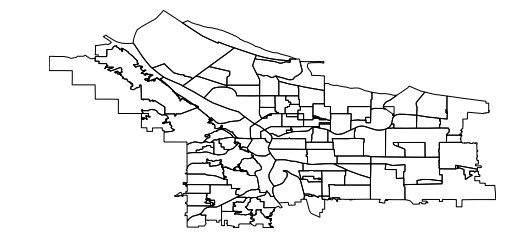

In [241]:
geoplot.polyplot(df_PDX, figsize=(8, 4))

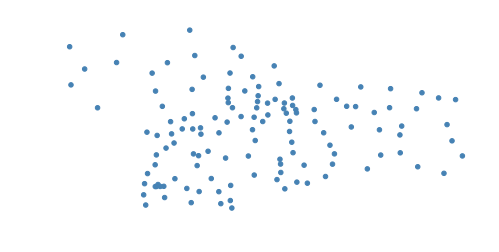

In [242]:
df_PDX['centroid_column'] = df_PDX.centroid
df_PDX = df_PDX.set_geometry('centroid_column')
geoplot.pointplot(df_PDX, figsize=(8, 4))

In [243]:
df_PDX.head()

,OBJECTID,NAME,COMMPLAN,SHARED,COALIT,HORZ_VERT,Shape_Leng,MAPLABEL,geometry,centroid_column
0,1,LINNTON,None,None,NWNW,HORZ,52741.719772,Linnton,POLYGON ((-122.8237089611819 45.60615857772244...,POINT (-122.7932636868732 45.60378993637904)
1,2,FOREST PARK/LINNTON,None,Y,NWNW,None,57723.635350,Forest Park/Linnton,POLYGON ((-122.8231909270121 45.60615651892255...,POINT (-122.7817746512876 45.58063023423168)
2,3,FOREST PARK,None,None,NWNW,HORZ,82222.098924,Forest Park,POLYGON ((-122.7558129418403 45.51954858251791...,POINT (-122.7922472760931 45.56412790016483)
3,4,CATHEDRAL PARK,None,None,NPNS,HORZ,11434.254777,Cathedral Park,"POLYGON ((-122.7646055108057 45.58518893125, -...",POINT (-122.7573167006587 45.58736826406707)
4,5,UNIVERSITY PARK,None,None,NPNS,HORZ,11950.859827,University Park,POLYGON ((-122.7385520535061 45.58394808045919...,POINT (-122.730079200974 45.57635375668904)


In [196]:
url = "https://opendata.arcgis.com/datasets/17418ff4986440dcb7058b1c6533e94b_384.zip"
df_SEA = geopandas.read_file(url)

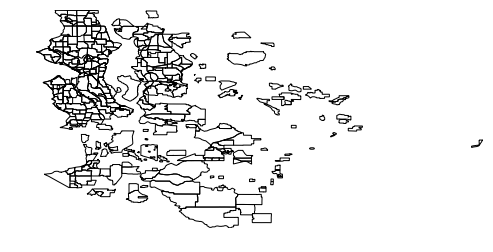

In [197]:
geoplot.polyplot(df_SEA, figsize=(8, 4))

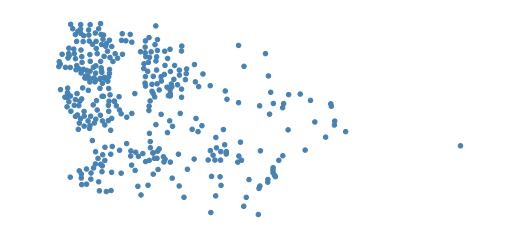

In [198]:
df_SEA['centroid_column'] = df_SEA.centroid
df_SEA = df_SEA.set_geometry('centroid_column')
geoplot.pointplot(df_SEA, figsize=(8, 4))

In [199]:
df_SEA.head()

,OBJECTID,NEIGH_NUM,NEIGHBORHO,SHAPE_Leng,SHAPE_Area,geometry,centroid_column
0,1,37,University District,40436.205860,4.948493e+07,POLYGON ((-122.3189590288485 47.67250069638226...,POINT (-122.3083432983634 47.65974477809413)
1,2,38,Wallingford,32080.778300,4.210762e+07,"POLYGON ((-122.346114180476 47.66505276831814,...",POINT (-122.333074933286 47.6600056037032)
2,3,101,Interbay,59930.630161,3.372042e+07,"POLYGON ((-122.397942744914 47.66481700558359,...",POINT (-122.3810137208626 47.6415067002665)
3,4,227,West Campus - Fed Way,36341.429112,6.639272e+07,"POLYGON ((-122.348030734308 47.3151893486264, ...",POINT (-122.3317456456217 47.30427628594848)
4,5,245,Berkshire Glen,10597.297569,7.048653e+06,POLYGON ((-122.1764963769378 47.32992973688438...,POINT (-122.1710183904485 47.33329555183212)


In [248]:
!wget -O OnPremise.xls https://lcb.wa.gov/sites/default/files/publications/Public_Records/2019/On%20Premise.xls
WAOnPrem = pd.read_excel("OnPremise.xls")
WAOnPrem.head()

--2019-05-25 01:17:18--  https://lcb.wa.gov/sites/default/files/publications/Public_Records/2019/On%20Premise.xls
Resolving lcb.wa.gov (lcb.wa.gov)... 54.200.32.191, 54.71.211.209
Connecting to lcb.wa.gov (lcb.wa.gov)|54.200.32.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5694976 (5.4M) [application/vnd.ms-excel]
Saving to: ‘OnPremise.xls’

100%[======================================>] 5,694,976   8.97MB/s   in 0.6s   

2019-05-25 01:17:19 (8.97 MB/s) - ‘OnPremise.xls’ saved [5694976/5694976]



,Tradename,License Number,Unnamed: 2,ID Number,Unnamed: 4,Loc Address,Loc Room,Loc City,Loc St,Loc Zip,...,Business Startup Date,Issue Date,Expire Date,Privilege,Application Date,Reason Description,County,Status,Night Phone,Licensee
0,'AMONOS! MEXICAN KITCHEN,409730,NaN,6033641060010001,NaN,15321 MAIN ST NE STE 201,,DUVALL,WA,980198574,...,20180327,20190207,20200131,BEER/WINE REST - BEER/WINE,20190207,RENEWAL,KING,ACTIVE (ISSUED),2062341746,NIKOS NORTHWEST LLC
1,/NA:M/ THAI CUISINE,76997,NaN,6028006010010001,NaN,1404 34TH AVE,,SEATTLE,WA,981223334,...,20090608,20190212,20200229,SPIRITS/BR/WN REST LOUNGE +,20190212,RENEWAL,KING,ACTIVE (ISSUED),2063544900,W2K LLC
2,00 PIZZA,409193,NaN,6029630190010002,NaN,31217 124TH AVE SE STE 6,,AUBURN,WA,980923618,...,20121015,20171104,20181031,BEER/WINE REST - BEER/WINE,20171104,RENEWAL,KING,ACTIVE (ISSUED),2069542522,"ORGANICWAY, LLC"
3,028 BARBER SHOP,426995,NaN,6042693900010001,NaN,14031 NE WOODINVILLE DUVALL RD,,WOODINVILLE,WA,980728504,...,20181115,20190306,20200331,SNACK BAR,20190306,RENEWAL,KING,ACTIVE (ISSUED),4258693670,"NEW EASTHILL, LLC"
4,101 BAR & GRILL,353737,NaN,6028914650010001,NaN,322 LINCOLN ST,,HOQUIAM,WA,985501409,...,20090317,20190129,20200131,SPIRITS/BR/WN REST LOUNGE -,20190129,RENEWAL,GRAYS HARBOR,ACTIVE (ISSUED),2535663698,"PIG, INC"


In [249]:
WAOnPrem.drop(['License Number', 'Unnamed: 2', 'ID Number', 'Unnamed: 4','Loc Room', 'Phone',
       'Mail Address', 'Mail City', 'Mail State', 'Mail Zip', 'Issue Date', 'Expire Date',
        'Application Date', 'Reason Description', 'Night Phone', 'Licensee'], axis=1, inplace=True)

In [250]:
WA_KING = WAOnPrem.loc[WAOnPrem['County'] == "KING"]

In [251]:
WA_KING.head()

,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status
0,'AMONOS! MEXICAN KITCHEN,15321 MAIN ST NE STE 201,DUVALL,WA,980198574,20180327,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED)
1,/NA:M/ THAI CUISINE,1404 34TH AVE,SEATTLE,WA,981223334,20090608,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED)
2,00 PIZZA,31217 124TH AVE SE STE 6,AUBURN,WA,980923618,20121015,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED)
3,028 BARBER SHOP,14031 NE WOODINVILLE DUVALL RD,WOODINVILLE,WA,980728504,20181115,SNACK BAR,KING,ACTIVE (ISSUED)
7,108 VIETNAMESE CAJUN CRAWFISH BROILER,18114 E VALLEY HWY,KENT,WA,980321001,20141105,BEER/WINE REST - BEER,KING,ACTIVE (ISSUED)


In [252]:
WA_KING.shape

(3991, 9)

In [253]:
3991 / 150

26.606666666666666

In [254]:
WA_KING['Premises'] = WA_KING['Loc Address'].astype(str) + ' , ' +  WA_KING['Loc City'] + ' , ' + WA_KING['Loc St']
WA_KING.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status,Premises
0,'AMONOS! MEXICAN KITCHEN,15321 MAIN ST NE STE 201,DUVALL,WA,980198574,20180327,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"15321 MAIN ST NE STE 201 , DUVALL ..."
1,/NA:M/ THAI CUISINE,1404 34TH AVE,SEATTLE,WA,981223334,20090608,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"1404 34TH AVE , SEATTLE ..."
2,00 PIZZA,31217 124TH AVE SE STE 6,AUBURN,WA,980923618,20121015,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"31217 124TH AVE SE STE 6 , AUBURN ..."
3,028 BARBER SHOP,14031 NE WOODINVILLE DUVALL RD,WOODINVILLE,WA,980728504,20181115,SNACK BAR,KING,ACTIVE (ISSUED),"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ..."
7,108 VIETNAMESE CAJUN CRAWFISH BROILER,18114 E VALLEY HWY,KENT,WA,980321001,20141105,BEER/WINE REST - BEER,KING,ACTIVE (ISSUED),"18114 E VALLEY HWY , KENT ..."


In [255]:
WA_KING.to_csv(path_or_buf= 'WA_KING.csv' )
p = Path('./')
list(file.name for file in p.glob('*'))

['OR_MULTNOMAH_Type.csv',
 'OR_0.csv',
 'OR_9.csv',
 'OR_4.csv',
 'OR_6.csv',
 'OR_3.csv',
 'OLCC_Licenses.xls',
 'WA_KING.csv',
 'OR_16.csv',
 'OR_14.csv',
 'OR_12.csv',
 'OR_7.csv',
 'OnPremise.xls',
 'OR_8.csv',
 'OR_11.csv',
 'OR_13.csv',
 'OR_10.csv',
 'OR_15.csv',
 'OR_1.csv',
 'OR_5.csv',
 'OR_2.csv']

In [256]:
df_split = splitDataFrameIntoSmaller(WA_KING, chunkSize = 150)

In [257]:
df_split[0].head()

,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status,Premises
0,'AMONOS! MEXICAN KITCHEN,15321 MAIN ST NE STE 201,DUVALL,WA,980198574,20180327,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"15321 MAIN ST NE STE 201 , DUVALL ..."
1,/NA:M/ THAI CUISINE,1404 34TH AVE,SEATTLE,WA,981223334,20090608,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"1404 34TH AVE , SEATTLE ..."
2,00 PIZZA,31217 124TH AVE SE STE 6,AUBURN,WA,980923618,20121015,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"31217 124TH AVE SE STE 6 , AUBURN ..."
3,028 BARBER SHOP,14031 NE WOODINVILLE DUVALL RD,WOODINVILLE,WA,980728504,20181115,SNACK BAR,KING,ACTIVE (ISSUED),"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ..."
7,108 VIETNAMESE CAJUN CRAWFISH BROILER,18114 E VALLEY HWY,KENT,WA,980321001,20141105,BEER/WINE REST - BEER,KING,ACTIVE (ISSUED),"18114 E VALLEY HWY , KENT ..."


In [258]:
PremisesList = df_split[0]['Premises'].tolist()
PremisesList

['15321 MAIN ST NE STE 201       , DUVALL                   , WA',
 '1404 34TH AVE                  , SEATTLE                  , WA',
 '31217 124TH AVE SE STE 6       , AUBURN                   , WA',
 '14031 NE WOODINVILLE DUVALL RD , WOODINVILLE              , WA',
 '18114 E VALLEY HWY             , KENT                     , WA',
 '7638 NE BOTHELL WAY            , KENMORE                  , WA',
 '12255 AURORA AVE N             , SEATTLE                  , WA',
 '900 BELLEVUE WAY NE STE 100    , BELLEVUE                 , WA',
 '125 BOREN AVE N                , SEATTLE                  , WA',
 '125 BOREN AVE N                , SEATTLE                  , WA',
 '18000 PACIFIC HWY S            , SEATAC                   , WA',
 '18000 PACIFIC HWY S            , SEATAC                   , WA',
 '255 S KING ST                  , SEATTLE                  , WA',
 '2305 EASTLAKE AVE E            , SEATTLE                  , WA',
 '3510 STONE WAY N               , SEATTLE                  , 

In [261]:
results = batch_geocode(PremisesList)

Token is valid but access is denied.
User does not have permissions to access geocodeAddresses.


RuntimeError: Token is valid but access is denied.
User does not have permissions to access geocodeAddresses.
(Error Code: 403)